In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df = pd.read_csv("Housing_data_CPH.csv", sep=";")
#df.head()


/var/folders/rm/gv1rcxy91gv9f4rjy65zb6b40000gn/T/ipykernel_2376/1696493870.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Housing_data_CPH.csv", sep=";")


# Identyfing columns & changing name to english & Basic data info

In [1]:
df.rename(columns={'Årmåned_salg': 'yearMonth_sale' , 'grundareal': 'ground_area', 'boligareal':'residental_area', 'vægtet_areal':'measured_area',
       'energimærke_påkrævet':'energy_labeled_required', 'energimærke':'energy_labeled', 'antvandskyltoilleter':'amount_of_toilets',
       'opvarmningskode':'heating_code', 'varmeinstallationskode':'heating_installation_code', 'ydervægkode':'exterior_wall_code', 'byggeår':'year_of_construction',
       'renoveringsår':'renovation_year', 'md_ejerudgifter':'owner_expenses', 'første_udbudspris':'first_offer_price',
       'senest_annonceret_pris':'lastest_announced_price', 'tinglyst_pris':'sold_price','dage_på_markedet_v_seneste_mægler':'days_on_the_market_latest_broker', 'dage_på_markedet_v_alle_mæglere':'days_on_the_market_all_broker'}, inplace=True)
df.head(50)

NameError: name 'df' is not defined

In [4]:
print("\nOur data set has {} rows and {} columns".format( df.shape[0], df.shape[1]))

#To print the name of all the columns

#columns = list(df.columns)
#print("\n\n The name of the columns:")
#for i in columns:
#    print (" -  ",i)
#
#    column_names = []


# To check the data type of each columns
print("\n",df.dtypes)


Our data set has 72282 rows and 28 columns

 yearMonth_sale                        int64
case_type_dk                         object
municipality_name                    object
zip_code                              int64
zip_code_name                        object
erts89_utm32_x                       object
erts89_utm32_y                       object
ed50_x                               object
ed50_y                               object
wgs84_lat                            object
wgs84_lon                            object
ground_area                         float64
residental_area                       int64
measured_area                        object
energy_labeled_required              object
energy_labeled                       object
amount_of_toilets                     int64
heating_code                          int64
heating_installation_code             int64
exterior_wall_code                    int64
year_of_construction                float64
renovation_year               

# Counting N/A values & Infinite values

In [5]:

# Select columns with numeric data types only
numeric_cols = df.select_dtypes(include=np.number).columns

# Check for infinite values in selected columns
inf_count = np.isinf(df[numeric_cols]).sum()

# Print the count of infinite values by column
print(inf_count)


yearMonth_sale                      0
zip_code                            0
ground_area                         0
residental_area                     0
amount_of_toilets                   0
heating_code                        0
heating_installation_code           0
exterior_wall_code                  0
year_of_construction                0
renovation_year                     0
owner_expenses                      0
first_offer_price                   0
lastest_announced_price             0
sold_price                          0
days_on_the_market_latest_broker    0
days_on_the_market_all_broker       0
dtype: int64


In [6]:
# count the unique values for each feature
df.nunique(axis=0)


yearMonth_sale                        138
case_type_dk                            4
municipality_name                       1
zip_code                              240
zip_code_name                          14
erts89_utm32_x                      38368
erts89_utm32_y                      38328
ed50_x                              38374
ed50_y                              38355
wgs84_lat                           36755
wgs84_lon                           37531
ground_area                          1609
residental_area                       334
measured_area                        1158
energy_labeled_required                 2
energy_labeled                         12
amount_of_toilets                       8
heating_code                            6
heating_installation_code               8
exterior_wall_code                     13
year_of_construction                  286
renovation_year                       132
owner_expenses                       6534
first_offer_price                 

In [7]:

for i in range(0,28): 
    if (df[df.columns[i]].isna().sum())>0:
        print("{:10.0f}   is the amount of null values that the columns following columns has:    {}".format(df[df.columns[i]].isna().sum(),df.columns[i]))

#print("total amount of Na values\n")
#df.isna().sum()


     49926   is the amount of null values that the columns following columns has:    ground_area
      2886   is the amount of null values that the columns following columns has:    measured_area
         4   is the amount of null values that the columns following columns has:    energy_labeled_required
      2436   is the amount of null values that the columns following columns has:    energy_labeled
         2   is the amount of null values that the columns following columns has:    year_of_construction
     61518   is the amount of null values that the columns following columns has:    renovation_year
     16809   is the amount of null values that the columns following columns has:    owner_expenses
      1805   is the amount of null values that the columns following columns has:    days_on_the_market_latest_broker
      4164   is the amount of null values that the columns following columns has:    days_on_the_market_all_broker


# Converting the type of data in some of the features

In [8]:
#df["days_on_the_market_all_broker"] = df["days_on_the_market_all_broker"].apply(lambda x: int(x) if pd.notna(x) else x)
df["days_on_the_market_all_broker"] = df["days_on_the_market_all_broker"].astype('Int64')
df["days_on_the_market_latest_broker"] = df["days_on_the_market_latest_broker"].astype('Int64')
df["owner_expenses"] = df["owner_expenses"].astype('Int64')
df["renovation_year"] = df["renovation_year"].astype('Int64')
df["year_of_construction"] = df["year_of_construction"].astype('Int64')



# Remove commas from the "year_of_construction" column
df["measured_area"] = df["measured_area"].str.replace(',', '.')

# Convert the "year_of_construction" column to a float type with 2 decimal points
df["measured_area"] = df["measured_area"].astype(float).round(2)



In [9]:
#Checking again if the data type was changed correctly

#print(df.dtypes)
#df.head()

# Show unique values to check imbalance, human errors or other possible issues with the data

##### Showing each of unique values in each feature & sorted to spot outliers

In [10]:
def get_unique_sorted_values(df, column_name, ascending=True):
    # Get the unique values of the column, including NaN values
    unique_values = df[column_name].unique()

    # Sort the unique values, handling NaN values separately
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # If the column contains numeric data, sort NaN values before all other values, then sort remaining values in ascending order
        sorted_values = sorted(
            unique_values, key=lambda x: (pd.isnull(x), x)
        )
    else:
        # If the column contains non-numeric data, sort NaN values before all other values, then sort remaining values in ascending order based on their string representations
        sorted_values = sorted(
            unique_values, key=lambda x: (pd.isnull(x), str(x))
        )


    # Reverse the sorted array if `ascending` is False
    if not ascending:
        sorted_values = sorted_values[::-1]

    # Return the sorted array of unique values
    return sorted_values


    # Loop through all columns in the DataFrame, except for excluded columns
excluded_cols = ["erts89_utm32_x", "erts89_utm32_y", "ed50_x",
                 "ed50_y", "wgs84_lat", "wgs84_lon"]
with open("unique_values.txt", "w") as f:
    for col in df.columns:
        if col not in excluded_cols:
            # Get sorted unique values for the current column
            unique_values = get_unique_sorted_values(df, col)
            # Write the column name and the unique values to the file
            unique_str = ", ".join(str(value) for value in unique_values)
            f.write(f"\n\nUnique sorted values of column {col}:\n {unique_str}\n\n")

#### Amount of each unique values

This its done to check if there are outliers among those unique values

In [11]:
def get_unique_sorted_values(df, column_name, ascending=True):
    # Get the unique values of the column, including NaN values
    unique_values = df[column_name].unique()

    # Sort the unique values, handling NaN values separately
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # If the column contains numeric data, sort NaN values before all other values, then sort remaining values in ascending order
        sorted_values = sorted(
            unique_values, key=lambda x: (pd.isnull(x), x)
        )
    else:
        # If the column contains non-numeric data, sort NaN values before all other values, then sort remaining values in ascending order based on their string representations
        sorted_values = sorted(
            unique_values, key=lambda x: (pd.isnull(x), str(x))
        )

    # Reverse the sorted array if `ascending` is False
    if not ascending:
        sorted_values = sorted_values[::-1]

    # Count the occurrences of each unique value
    value_counts = df[column_name].value_counts(dropna=False)

    # Create a dictionary mapping each unique value to its count
    value_count_dict = {value: value_counts.get(value, 0) for value in sorted_values}

    # Return the dictionary of unique values and their counts
    return value_count_dict


In [12]:

# Loop through all columns in the DataFrame, except for excluded columns
excluded_cols = ["erts89_utm32_x", "erts89_utm32_y", "ed50_x",
                 "ed50_y", "wgs84_lat", "wgs84_lon"]
with open("unique_values_counted.txt", "w") as f:
    for col in df.columns:
        if col not in excluded_cols:
            # Get the count of unique values for the current column
            unique_counts = get_unique_sorted_values(df, col)
            # Write the column name and the unique values to the file
            unique_str = ", ".join(
                f"{value} ({count})" for value, count in unique_counts.items()
            )
            f.write(f"\n\nUnique values and their counts of column {col}:\n {unique_str}\n\n")

# Columns dropped due to above analysis

Ground area & Municipality name & Zip code dropped

In [13]:
#inplace = True : modifies the DataFrame without the need to save it in a new one. Due to inplace, once you run the code if you try
#                 to run it again you will get the error "KeyError: "['ground_area'] not found in axis""


# Ground area has too many missing values: 
df.drop(["ground_area"], axis = 1, inplace = True)

#Municipality name has only one class, therefore its not relevant for the ML model. With the Zip_code_name its enought 
df.drop(["municipality_name"], axis = 1, inplace = True)

# zip_code: In compare to zip_code_name it does not provide us with much information, since there are too many zip_code that gather just a few samples.
# On the other hand, Zip_code_names group them by neighbourhood and that is more valuable for our future ML model.  
df.drop(["zip_code"], axis = 1, inplace = True)


#exterior_wall_code it has a big imbalance between the classes and we do not know what actually mean in our Data set
df.drop(["exterior_wall_code"], axis = 1, inplace = True)


Heating code & Heating installation code dropped

In [14]:
#heating_code feature was totally imbalance and do not provide valuable information for our ML model 
# —>  Unique values and their counts of column heating_code: 1 (388), 2 (17), 4 (3), 7 (1), 9 (4), 9999 (71869) 
df.drop(["heating_code"], axis = 1, inplace = True)



In [15]:
#heating_installation_code: Same as heating  code feature —>
#Unique values and their counts of column heating_installation_code:
#1 (149), 2 (14), 3 (6), 5 (21), 6 (1), 7 (364), 8 (4), 9999 (71723)

df.drop(["heating_installation_code"], axis = 1, inplace = True)


In [16]:
df.head()

,yearMonth_sale,case_type_dk,zip_code_name,erts89_utm32_x,erts89_utm32_y,ed50_x,ed50_y,wgs84_lat,wgs84_lon,residental_area,measured_area,energy_labeled_required,energy_labeled,amount_of_toilets,year_of_construction,renovation_year,owner_expenses,first_offer_price,lastest_announced_price,sold_price,days_on_the_market_latest_broker,days_on_the_market_all_broker
0,201806,Rækkehus,København Ø,724661.3697431379,6177506.430197247,724743.4370031202,6177712.574576871,"55,69122405","12,57460491",144,159.00,False,e,2,1882,<NA>,5321,9500000,9500000,9600000,<NA>,<NA>
1,201906,Rækkehus,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",121,136.45,False,NaN,2,1882,<NA>,5362,9998000,9998000,9350000,<NA>,<NA>
2,201805,Rækkehus,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",121,136.00,True,c,2,1882,<NA>,5324,9895000,9500000,8500000,79,79
3,201805,Rækkehus,København Ø,724612.6998841494,6177539.480294425,724694.7669242901,6177745.625006782,"55,69154296","12,57385928",136,151.00,True,c,2,1882,1974,5469,9595000,9195000,8750000,96,96
4,202006,Villa,København S,726339.2701369224,6172005.4193364065,726421.3337691108,6172211.5248479135,"55,64111328","12,59671021",107,126.00,True,d,1,1927,<NA>,4434,4195000,3995000,3900000,148,148


# Replacing N/A values & more

In [17]:
#renovation_year: All the N/A values are consider as non-renovated and the renovation year will be considered as 1 = Renovated

# replace N/A values with 0 = non-renovated
df["renovation_year"].fillna(value=0, inplace=True)

# replace other values with 1 = renovated
df["renovation_year"].loc[df["renovation_year"] != 0] = 1


Changing values of energy_labeled

In [18]:

# Replace the values of the "energy_labeled" column
df.loc[df["energy_labeled"].isin(["a1", "a2", "a2010", "a2015", "a2020"]), "energy_labeled"] = "a"


# Drop samples with technical or human errors 

In [19]:

# drop rows with values "9999" and "22" in a amount_of_toilets column (727 samples dropped)
df = df[(df["amount_of_toilets"] != 9999) & (df["amount_of_toilets"] != 22)]


In [20]:
df.shape

(71575, 22)

Cutting some samples due to year of construction too old and we do not know if its true + there was a value of 2024
Also an outlier in residential area

In [21]:

# filter houses built from 1700 onwards
df = df[(df["year_of_construction"] >= 1700) & (df["year_of_construction"]!= 2024)]

# Delete that outlier sample residental_area
df = df[(df["residental_area"]!= 1742)]

#Delete that outlier sample for measured_area
df = df[(df["measured_area"]!= 13648.0)]






# Analysing Days on the market for all brokers and last broker + dropping days on the market on last broker

Analysing the amount of matching values, NaN values, and percenteges 

In [22]:
# Find samples with matching NaN values in both columns
matching_na_samples = df[(df["days_on_the_market_latest_broker"].isna()) & (df["days_on_the_market_all_broker"].isna())]

# Find all other matching samples
matching_non_na_samples = df[(df["days_on_the_market_latest_broker"] == df["days_on_the_market_all_broker"]) & (~df["days_on_the_market_latest_broker"].isna())]

# Combine the two sets of samples into one dataframe
matching_samples = pd.concat([matching_na_samples, matching_non_na_samples])

# Calculate the percentage of matching samples (including NaN values)
matching_percentage = len(matching_samples) / len(df) * 100

print(f"Number of samples with matching values: {len(matching_non_na_samples)}")
print(f"Number of samples with NaN matching values: {len(matching_na_samples)}")
print(f"Percentage of matching samples (including NaN): {matching_percentage:.2f}%")



# Count NaN values in each column
latest_broker_na_count = df["days_on_the_market_latest_broker"].isna().sum()
all_broker_na_count = df["days_on_the_market_all_broker"].isna().sum()
print(f"NaN count in latest broker column: {latest_broker_na_count}")
print(f"NaN count in all broker column: {all_broker_na_count}")


Number of samples with matching values: 58575
Number of samples with NaN matching values: 1688
Percentage of matching samples (including NaN): 84.30%
NaN count in latest broker column: 1754
NaN count in all broker column: 3990


Replacing those samples that have NaN values in days_on_the_market_all_broker with those values in days_on_the_market_latest_broker

In [23]:

# Replace NaN values in "days_on_the_market_all_broker" column
# with values from "days_on_the_market_latest_broker" column
latest_broker_values = df["days_on_the_market_latest_broker"]
all_broker_values = df["days_on_the_market_all_broker"]
nan_indices = all_broker_values[all_broker_values.isna()].index
#~latest_broker_values.isna() taking the NON-N/A values
valid_indices = latest_broker_values[~latest_broker_values.isna()].index
replace_indices = nan_indices.intersection(valid_indices)
df.loc[replace_indices, "days_on_the_market_all_broker"] = latest_broker_values.loc[replace_indices]




Compare results for matching values NaN values, etc with the ones above

In [24]:
# Find samples with matching NaN values in both columns
matching_na_samples = df[(df["days_on_the_market_latest_broker"].isna()) & (df["days_on_the_market_all_broker"].isna())]

# Find all other matching samples
matching_non_na_samples = df[(df["days_on_the_market_latest_broker"] == df["days_on_the_market_all_broker"]) & (~df["days_on_the_market_latest_broker"].isna())]

# Combine the two sets of samples into one dataframe
matching_samples = pd.concat([matching_na_samples, matching_non_na_samples])

# Calculate the percentage of matching samples (including NaN values)
matching_percentage = len(matching_samples) / len(df) * 100

print(f"Number of samples with matching values: {len(matching_non_na_samples)}")
print(f"Number of samples with NaN matching values: {len(matching_na_samples)}")
print(f"Percentage of matching samples (including NaN): {matching_percentage:.2f}%")



# Count NaN values in each column
latest_broker_na_count = df["days_on_the_market_latest_broker"].isna().sum()
all_broker_na_count = df["days_on_the_market_all_broker"].isna().sum()
print(f"NaN count in latest broker column: {latest_broker_na_count}")
print(f"NaN count in all broker column: {all_broker_na_count}")

Number of samples with matching values: 60877
Number of samples with NaN matching values: 1688
Percentage of matching samples (including NaN): 87.52%
NaN count in latest broker column: 1754
NaN count in all broker column: 1688


- Drop NaN values in days_on_the_market_all_broker
- Create new feature indicating if they changed or not broker
- Drop the feature: days_on_the_market_latest_broker

In [25]:
# Drop samples with NaN values in "days_on_the_market_all_broker"
df.dropna(subset=["days_on_the_market_latest_broker"], inplace=True)

# Create new feature "change_broker" with values 0 or 1
df["change_broker"] = df.apply(lambda row: 0 if row["days_on_the_market_latest_broker"] == row["days_on_the_market_all_broker"] else 1, axis=1)

# Count the amount of each class in "change_broker"
print(df["change_broker"].value_counts())





0    60877
1     8857
Name: change_broker, dtype: int64


In [26]:

# Find samples with matching NaN values in both columns
matching_na_samples = df[(df["days_on_the_market_latest_broker"].isna()) & (df["days_on_the_market_all_broker"].isna())]

# Find all other matching samples
matching_non_na_samples = df[(df["days_on_the_market_latest_broker"] == df["days_on_the_market_all_broker"]) & (~df["days_on_the_market_latest_broker"].isna())]

# Combine the two sets of samples into one dataframe
matching_samples = pd.concat([matching_na_samples, matching_non_na_samples])

# Calculate the percentage of matching samples (including NaN values)
matching_percentage = len(matching_samples) / len(df) * 100

print(f"Number of samples with matching values: {len(matching_non_na_samples)}")
print(f"Number of samples with NaN matching values: {len(matching_na_samples)}")
print(f"Percentage of matching samples (including NaN): {matching_percentage:.2f}%")



# Count NaN values in each column
latest_broker_na_count = df["days_on_the_market_latest_broker"].isna().sum()
all_broker_na_count = df["days_on_the_market_all_broker"].isna().sum()
print(f"NaN count in latest broker column: {latest_broker_na_count}")
print(f"NaN count in all broker column: {all_broker_na_count}")


#Drop days_on_the_market_latest_broker as it is no longer relevant for us
df.drop(["days_on_the_market_latest_broker"], axis = 1, inplace = True)

Number of samples with matching values: 60877
Number of samples with NaN matching values: 0
Percentage of matching samples (including NaN): 87.30%
NaN count in latest broker column: 0
NaN count in all broker column: 0


# Creating a new csv & txt file with the updated dataset

In [27]:
#New file with unique values
with open("unique_values2.txt", "w") as f:
    for col in df.columns:
        if col not in excluded_cols:
            # Get sorted unique values for the current column
            unique_values = get_unique_sorted_values(df, col)
            # Write the column name and the unique values to the file
            unique_str = ", ".join(str(value) for value in unique_values)
            f.write(f"\n\nUnique sorted values of column {col}:\n {unique_str}\n\n")

#New file with unique values + the amount of each 

with open("unique_values_counted2.txt", "w") as f:
    for col in df.columns:
        if col not in excluded_cols:
            # Get the count of unique values for the current column
            unique_counts = get_unique_sorted_values(df, col)
            # Write the column name and the unique values to the file
            unique_str = ", ".join(
                f"{value} ({count})" for value, count in unique_counts.items()
            )
            f.write(f"\n\nUnique values and their counts of column {col}:\n {unique_str}\n\n")

# Analysis of the extra NaN values that we have after cleaning the data frame. This can be move to above code afterwards - for the moment everything will be removed 

In [29]:
df.shape

(69734, 22)

In [30]:
for i in range(0,22): 
    if (df[df.columns[i]].isna().sum())>0:
        print("{:10.0f}   is the amount of null values that the columns following columns has:    {}".format(df[df.columns[i]].isna().sum(),df.columns[i]))


      2359   is the amount of null values that the columns following columns has:    measured_area
         4   is the amount of null values that the columns following columns has:    energy_labeled_required
      2239   is the amount of null values that the columns following columns has:    energy_labeled
     16575   is the amount of null values that the columns following columns has:    owner_expenses


In [31]:


# Create a new dataframe that only contains the rows with NaN values in the specified columns
nan_df = df[df[['energy_labeled', 'energy_labeled_required', 'measured_area']].isna().any(axis=1)]

# Get the count of rows with NaN values for each feature
energy_labeled_count = nan_df['energy_labeled'].isna().sum()
energy_labeled_required_count = nan_df['energy_labeled_required'].isna().sum()
measured_area_count = nan_df['measured_area'].isna().sum()

# Get the count of rows with NaN values for all three features
all_three_count = nan_df[(nan_df['energy_labeled'].isna()) &  
                         (nan_df['measured_area'].isna())].shape[0]

# Print the results
print(f"NaN values in energy_labeled: {energy_labeled_count}")
print(f"NaN values in energy_labeled_required: {energy_labeled_required_count}")
print(f"NaN values in measured_area: {measured_area_count}")
print(f"NaN values in all three features: {all_three_count}")




NaN values in energy_labeled: 2239
NaN values in energy_labeled_required: 4
NaN values in measured_area: 2359
NaN values in all three features: 540


In [32]:
#Owner_expenses dropped for now
df.drop(["owner_expenses"], axis = 1, inplace = True)

In [33]:
# Drop samples with NaN values in "energy_labeled"
df.dropna(subset=["energy_labeled"], inplace=True)

# Drop samples with NaN values in "energy_labeled_required"
df.dropna(subset=["energy_labeled_required"], inplace=True)

# Drop samples with NaN values in "energy_labeled"
df.dropna(subset=["measured_area"], inplace=True)


In [34]:
df.shape

(65676, 21)

In [35]:
for i in range(0,21): 
    if (df[df.columns[i]].isna().sum())>0:
        print("{:10.0f}   is the amount of null values that the columns following columns has:    {}".format(df[df.columns[i]].isna().sum(),df.columns[i]))


# Duplicates 

In [44]:
#Check how many duplicates there are
duplicates = df[df.duplicated()]

duplicates.shape

(8669, 21)

In [45]:


#Drop all duplicates 
df.drop_duplicates(inplace=True)


# Create a new file with the claned dataset

In [47]:
df.to_csv("clean_housing_data.csv", index=False)


# Correlation Matrix

<AxesSubplot:>

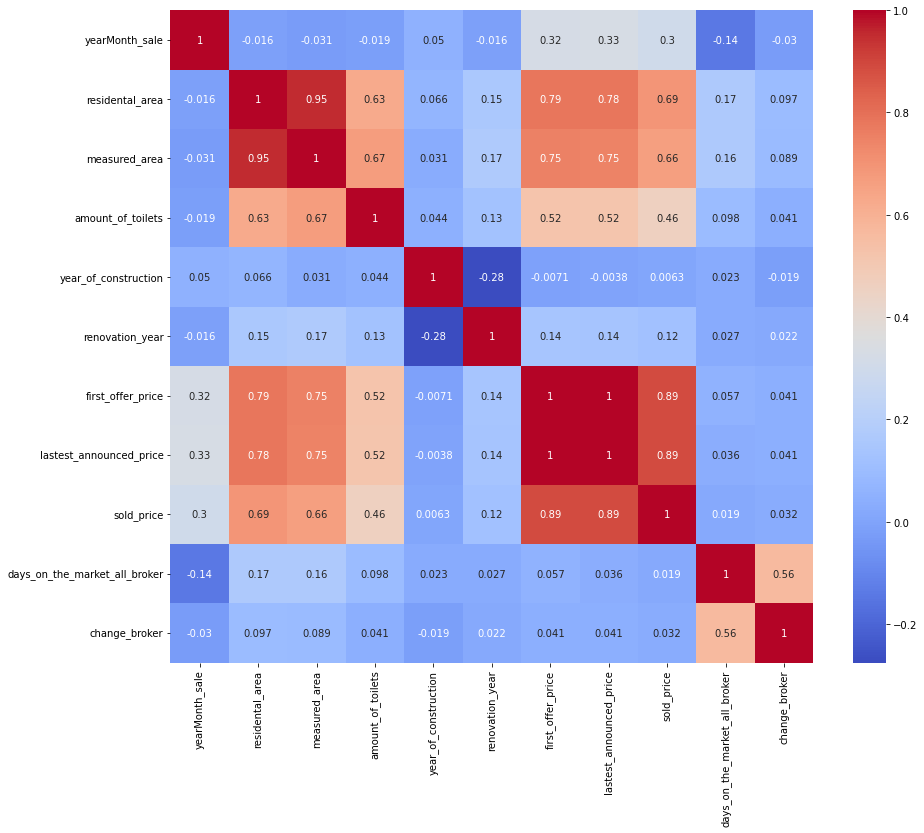

In [36]:

# Create correlation matrix
corr_matrix = df.drop(excluded_cols, axis=1).corr()


# Set figure size
plt.figure(figsize=(14.4,12))

# Create heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")




In [49]:
print(df.shape)
df.head(50)

(57007, 21)


,yearMonth_sale,case_type_dk,zip_code_name,erts89_utm32_x,erts89_utm32_y,ed50_x,ed50_y,wgs84_lat,wgs84_lon,residental_area,measured_area,energy_labeled_required,energy_labeled,amount_of_toilets,year_of_construction,renovation_year,first_offer_price,lastest_announced_price,sold_price,days_on_the_market_all_broker,change_broker
2,201805,Rækkehus,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",121,136.00,True,c,2,1882,0,9895000,9500000,8500000,79,0
3,201805,Rækkehus,København Ø,724612.6998841494,6177539.480294425,724694.7669242901,6177745.625006782,"55,69154296","12,57385928",136,151.00,True,c,2,1882,1,9595000,9195000,8750000,96,0
4,202006,Villa,København S,726339.2701369224,6172005.4193364065,726421.3337691108,6172211.5248479135,"55,64111328","12,59671021",107,126.00,True,d,1,1927,0,4195000,3995000,3900000,148,0
5,202103,Villa,København S,726314.7447286966,6171972.668490626,"726396,8081",6172178.773859339,"55,64083099","12,5962944",140,136.00,True,a,2,2017,0,7495000,7495000,7595000,17,0
6,201108,Villa,Brønshøj,718735.9998927611,6178448.999985718,718818.0324674495,6178655.165567457,"55,70238375","12,48127579",87,259.00,True,g,2,1928,0,2250000,2250000,2275000,15,0
7,201912,Villa,Valby,719959.2023814355,6174355.663413339,720041.2320496305,"6174561,8","55,66511917","12,49742126",107,132.00,True,f,2,1914,0,6498000,6498000,6825000,4,0
8,201202,Villa,Valby,719803.7621381008,6174318.587565216,719885.7907358984,6174524.724455848,"55,66485698","12,4949252",143,170.00,True,d,1,1930,1,4675000,4675000,4450000,627,1
9,202201,Rækkehus,København S,728076.8752870476,6173143.500418007,"728158,9527",6173349.608616426,"55,65050734","12,62520423",85,102.00,True,c,1,1943,0,4995000,4995000,5150000,16,0
10,201804,Villa,København S,728051.8197155168,6173097.609870959,728133.8968962858,6173303.717845376,"55,65010757","12,62476881",62,82.00,True,d,2,1937,0,3595000,3595000,3350000,19,0
12,201310,Villa,København S,"727991,0002",6173028.999614445,728073.0767765993,6173235.107313949,"55,64952083","12,62374739",59,84.00,True,c,2,1940,1,2195000,2195000,2145000,13,0


# Experimenting with Machine learning models 



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop("sold_price", axis=1), df2["sold_price"], test_size=0.2, random_state=42)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Train the ridge regression model
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

# Train the lasso regression model
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train, y_train)

# Train the decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Train the random forest regression model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Train the gradient boosting regression model
grad_boost_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
grad_boost_reg.fit(X_train, y_train)






After training the models, we can evaluate them using the mean squared error and R-squared score on the testing set:

# Make predictions on the testing set
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = forest_reg.predict(X_test)
y_pred_grad_boost = grad_boost_reg.predict(X_test)


# Calculate the mean squared error and R-squared score for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


# Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_train_score = linear_reg.score(X_train, y_train)
linear_test_score = linear_reg.score(X_test, y_test)
print("Linear Regression Train Score: {:.2f}".format(linear_train_score))
print("Linear Regression Test Score: {:.2f}".format(linear_test_score))

# Ridge regression
ridge_reg = Ridge(alpha=100000)
ridge_reg.fit(X_train, y_train)
ridge_train_score = ridge_reg.score(X_train, y_train)
ridge_test_score = ridge_reg.score(X_test, y_test)
print("Ridge Regression Train Score: {:.2f}".format(ridge_train_score))
print("Ridge Regression Test Score: {:.2f}".format(ridge_test_score))

# Lasso regression
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train, y_train)
lasso_train_score = lasso_reg.score(X_train, y_train)
lasso_test_score = lasso_reg.score(X_test, y_test)
print("Lasso Regression Train Score: {:.2f}".format(lasso_train_score))
print("Lasso Regression Test Score: {:.2f}".format(lasso_test_score))

# Decision tree regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_train_score = tree_reg.score(X_train, y_train)
tree_test_score = tree_reg.score(X_test, y_test)
print("Decision Tree Regression Train Score: {:.2f}".format(
    tree_train_score))
print("Decision Tree Regression Test Score: {:.2f}".format(
    tree_test_score))

# Random forest regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_train_score = forest_reg.score(X_train, y_train)
forest_test_score = forest_reg.score(X_test, y_test)
print("Random Forest Regression Train Score: {:.2f}".format(
    forest_train_score))
print("Random Forest Regression Test Score: {:.2f}".format(
    forest_test_score))

# Gradient boosting regression
grad_boost_reg = GradientBoostingRegressor(
    n_estimators=100, random_state=42)
grad_boost_reg.fit(X_train, y_train)
grad_boost_train_score = grad_boost_reg.score(X_train, y_train)
grad_boost_test_score = grad_boost_reg.score(X_test, y_test)
print("Gradient Boosting Regression Train Score: {:.2f}".format(
    grad_boost_train_score))
print("Gradient Boosting Regression Test Score: {:.2f}".format(
    grad_boost_test_score))

# Neural network regression
nn_reg = MLPRegressor(hidden_layer_sizes=(
    1000, 500), max_iter=1000, random_state=42)
nn_reg.fit(X_train, y_train)
nn_train_score = nn_reg.score(X_train, y_train)
nn_test_score = nn_reg.score(X_test, y_test)
print("Neural Network Regression Train Score: {:.2f}".format(
    nn_train_score))
print("Neural Network Regression Test Score: {:.2f}".format(nn_test_score))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=15d4d504-0dfd-4079-8130-fb228543c6d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>